# Neural Networks I -- Gradient Descent and Back Propagation


### Credits

The content builds upon Andrej Karpathy's excellent [video](https://youtu.be/VMj-3S1tku0?si=9HKPIq36EnHektSm) on building _micrograd_.

## Introduction

The purpose of this lecture is to open up the hood on some of the foundations of neural networks. Namely
* Minimizing a function
    * Partial Derivatives (both algorithmic and numerical)
    * The Chain Rule of derivatives.
* Computation of a Neuron and it's Partial Derivatives
* Graph Representation of a Neural Network
* Defining a loss function for Supervised Learning
* Backpropagating Partial Derivatives
* Using backpropagation

### Prediction Function

> In supervised learning we define a neural network that maps some input to an output and we want to find the parameters (e.g. weights) that matches some "ground truth" of a training set as closely as possible.

We can say our neural network, or model, is a function.

$$ f_w(x) = \hat{y} $$

Where $x$ is our input values, $w$ are some function parameters and $\hat{y}$ is the predicted output.

For supervised learning we have the actual outputs, $y$, a.k.a. the ground truth, for the training input data $x$.

### Loss Function

We define some loss function, $L(\hat{y}, y)$ that indicates how different the predicted values $\hat{y}$ are from the ground truth values, $y$.

So as with all supervised learning problems, the goal is to minimize the loss function somehow. In relatively rare cases there is a closed form solution, but as we'll see for neural networks, there isn't a closed form solution and so we'll have to search for a reasonable solution.

## Minimizing a Function

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

Supervised learning is fundamentally about minimizing some loss function.

So let's start with a simple scalar valued function.

$$ f(x) = 3x^2 - 4x +5$$

Which we can write in python as well.

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

And we can plot it.

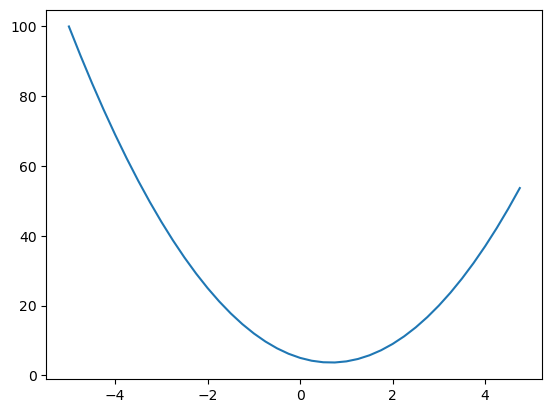

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Let's assume for a minute that this is our loss function that we are minimizing.



#### Question
What do we know about where the minimum is in terms of the slope of the curve?

#### Answer

It is necessary but _not sufficient_ that the slope be zero.

#### Question
How do we calculate the slope?

We take the derivative, denoted

$$ \frac{d f(x)}{dx} = f'(x) $$

We can take the derivate of the $f(x)$

$$ f(x) = 3x^2 - 4x +5$$

so

$$ \frac{d f(x)}{dx} = $$

#### Answer

We can take the derivate of the $f(x)$

$$ f(x) = 3x^2 - 4x +5$$

so

$$ \frac{d f(x)}{dx} = 6x - 4 $$

We use the rules of derivatives. Add reference to maybe wikipedia.

In [5]:
# define the derivate of f as df

def df(x):
    return 6*x - 4

We can solve for where $\frac{d}{dx} f(x) = 0$

$$ 6x - 4 = 0 $$
...

### *** Exercise *** (1 point)

Calculate where slope is zero then plug into df() below and uncomment.

In [7]:
# Find the x where df = 0 and update the value on the next line
x_zero = 2/3

# Evaluate df
df(x_zero)

0.0

In [8]:
# And f at that value is
f(x_zero)

3.666666666666667

Which we can add to the plot of $f(x)$ to see if it indeed is at the minimum.

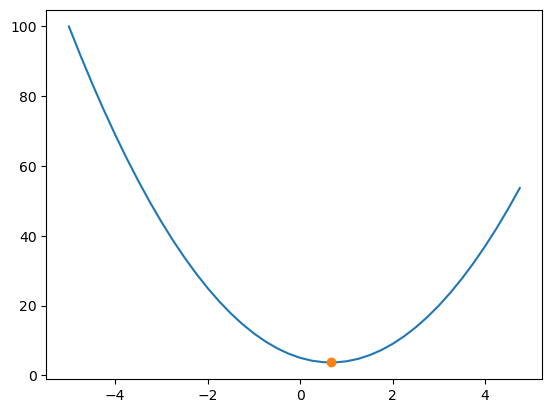

In [9]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

# Add a circle point at (2, 5)
plt.plot([x_zero], [f(x_zero)], 'o')

# Show the plot
plt.show()

Now as Wikipedia [states](https://en.wikipedia.org/wiki/Derivative),

> The derivative of a function of a single variable at a chosen input value, when it exists, is the slope of the tangent line to the graph of the function at that point.

### Slope of a Function

We can explore the tangent at different x-values.

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the function f(x)
def f(x):
    return 3 * x ** 2 - 4 * x + 5

# Define the derivative f'(x)
def df(x):
    return 6 * x - 4

# Function to plot f(x) and its tangent line at x = x_value
def plot_with_tangent(x_value):
    # Generate x values for the function
    x = np.linspace(-5, 5, 400)
    y = f(x)

    # Compute the slope and function value at x = x_value
    slope_at_x_value = df(x_value)
    f_at_x_value = f(x_value)

    # Generate x and y values for the tangent line near x = x_value
    x_tangent = np.linspace(x_value - 2, x_value + 2, 400)
    y_tangent = f_at_x_value + slope_at_x_value * (x_tangent - x_value)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x) = 3x^2 - 4x + 5')
    plt.plot(x_tangent, y_tangent, linestyle='--', label=f'Asymptotic slope of {df(x_value):.2f} at x = {x_value:.2f}')
    plt.scatter([x_value], [f_at_x_value], color='red')  # point of tangency
    plt.title('Plot of the function f(x) = 3x^2 - 4x + 5')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create an interactive widget
widgets.interact(plot_with_tangent, x_value=widgets.FloatSlider(value=-2, min=-5, max=5, step=0.1));


interactive(children=(FloatSlider(value=-2.0, description='x_value', max=5.0, min=-5.0), Output()), _dom_class…

### Slope Shows Influence of $x$ on $f$

__Important Note:__
* if the slope is negative, then by increasing $x$, we will decrease $f(x)$.
* And if the slope is positive, then decreasing $x$ will decrease $f(x)$.

### Numerical Approximation

Even if We can't calculate the derivative analytically, we can approximate it. Going back to the Wikipedia
[derivative](https://en.wikipedia.org/wiki/Derivative), the function $f(x)$ is differentiable at $x$ if

$$ \lim_{h\to 0} \frac{f(a+h)-f(a)}{h} $$

exists at $x$. And in fact, that limit approaches the value of the derivative in the limit.

So for a small $h$ we see that at $ x = 2/3$, the ratio is near zero.

In [11]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

We can visualize this with the following interactive plot with two sliders:
1. One for the $x$ value, and
2. One for the $h$ value

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the function f(x)
def f(x):
    return 3 * x ** 2 - 4 * x + 5

# Define the derivative f'(x)
def df(x):
    return 6 * x - 4

# Function to plot f(x) and its tangent line at x = x_value
def plot_with_tangents(x_value, h_value):
    # Generate x values for the function
    x = np.linspace(-5, 5, 400)
    y = f(x)

    #h_value = 10**(-e_value)

    # Compute the slope and function value at x = x_value
    slope_at_x_value = df(x_value)
    limit_at_x_value = (f(x_value + h_value) - f(x_value)) / h_value
    f_at_x_value = f(x_value)
    f_at_x_plus_h_value = f(x_value + h_value)

    # Generate x and y values for the tangent line near x = x_value
    x_tangent = np.linspace(x_value - 2, x_value + 2, 400)
    y_tangent = f_at_x_value + slope_at_x_value * (x_tangent - x_value)
    y_limit_tangent = f_at_x_value + limit_at_x_value * (x_tangent - x_value)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x) = 3x^2 - 4x + 5')
    plt.plot(x_tangent, y_tangent, linestyle='--', label=f'Asymptotic slope of {df(x_value):.2f} at x = {x_value:.2f}')
    plt.plot(x_tangent, y_limit_tangent, linestyle='-.', label=f'Asymptotic limit of {limit_at_x_value:.2f} at x = {x_value:.2f}, h = {h_value:.3f}')
    plt.scatter([x_value], [f_at_x_value], color='red')  # point of tangency
    plt.scatter([x_value+h_value], [f_at_x_plus_h_value], color='red')  # point of tangency
    plt.title('Plot of the function f(x) = 3x^2 - 4x + 5')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create an interactive widget
widgets.interact(plot_with_tangents, x_value=widgets.FloatSlider(value=-2, min=-5, max=5, step=0.1), h_value=widgets.FloatSlider(value=1, min=.001, max=2, step=.001));
#widgets.interact(plot_with_tangents, h_value=widgets.FloatSlider(value=1, min=1, max=10, step=1));


interactive(children=(FloatSlider(value=-2.0, description='x_value', max=5.0, min=-5.0), FloatSlider(value=1.0…

### Interpretation of Slope

Let's illustrate with this function $f(x)$ a useful way to interpret the slope.

In the graph above, with $x=2$, we see the slope, call it $m$, is -16. What that means is that when we change the value of $x$, the impact on the ouptut will roughly be _amplified_ by $m$, or -16 when $x=2$.

Put another way, the slope (equivalently the derivative) of a function $f(x)$ at an input $x$ indicates how sensitive the output is to changes in the input.

> This will be key to understanding how we have to tweak the weights of our model to minimize our loss function.

## Building a Computation Graph

We ultimately want to build a "computation graph" to apply our operations on. We'll see that it's a powerful and scalable concept upon which we can train deep neural networks.

### Building the `Value` Class

To do that we will build a data wrapper as a `class` called `Value` and gradually build in on all the functionality we need to define a Multi-Layer Neural Network (a.k.a. Multi-Layer Perceptron) and train it.

We will gradually build up this class.

First, the class has only a simple initialization method and a representation method.

In [13]:
# Value version 1
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

In [14]:
a = Value(4.0)
a

Value(data=4.0)

### Implementing Addition

So the Value object doesn't do much yet except for taking a value and printing it. We'd also like to do things like addition and other operations with them, but...

In [15]:
a = Value(4.0)
b = Value(-3.0)

try:
    a+b
except Exception as e:
    print("Uh oh!", e)
else:
    print("It worked!")

Uh oh! unsupported operand type(s) for +: 'Value' and 'Value'


When python tries to add two objects, internally it will call
`a.__add__(b)`. So we have to add the `__add__()` method.

In [16]:
# Value version 2
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

In [17]:
a = Value(4.0)
b = Value(-3.0)

try:
    a+b
except Exception as e:
    print("Uh oh!", e)
else:
    print("It worked!")

It worked!


Which, as mentioned is equivalent to calling the `__add__` method on `a`.

In [18]:
a.__add__(b)

Value(data=1.0)

#### *** Exercise ***  (2 points)

One quirk of our definition is that we can't add a Value object and a python scalar value.

How could you modify `__add__` to accomodate native python scalar values?

In [19]:
a = Value(4.0)

try:
    a + 5.0
except Exception as e:
    print("Uh oh!", e)
else:
    print("It worked!")

Uh oh! 'float' object has no attribute 'data'


##### You Answer

(You can answer informally, or put a line or 2 of code to explain.)


### Implementing Multiplication

Similarly we can support multiplication.

In [20]:
# Value version 3
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

In [21]:
a = Value(4.0)
b = Value(-3.0)
c = Value(8.0)

d = a*b+c
d

Value(data=-4.0)

By the way, internally, python will call `__mul__` on `a`, then `__add__` on the temporary product object.

In [22]:
(a.__mul__(b)).__add__(c)

Value(data=-4.0)

### Child Nodes

In order to back propagate gradients, we will need to capture the expression graphs. To do that, we'll need to store pointers to the operands of each operation.

To start with, we'll accept a tuple of child nodes in the initializer and store that as a set in the object.

In [23]:
# Value version 4
class Value:
                            ## vvvvvvv
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)   ## <<<<<<<<<<<

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):              ## vvvvvvvvvv
        out = Value(self.data + other.data, (self, other))
        return out

    def __mul__(self, other):             ## vvvvvvvvvvv
        out = Value(self.data * other.data, (self, other))
        return out

In [24]:
a = Value(4.0)
b = Value(-3.0)
c = Value(8.0)

d = a*b
e = d + c

We can now see the children of the operands that produced the output value by printing the `_prev` value. The name `_prev` might not be intuitive yet, but it will make more sense when we view these operations as a graph.

In [25]:
d._prev

{Value(data=-3.0), Value(data=4.0)}

In [26]:
e._prev

{Value(data=-12.0), Value(data=8.0)}

#### Exericse

Because of the `__repr__` function, what we see are the data values of the object, but they are actually distinct objects. Try commenting out the `__repr__` function to see the objects themselves.

### Child Operations

Now we've recorded pointers to the child nodes. It would be helpful to also record the operation.

In [27]:
# Value version 5
class Value:

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [28]:
a = Value(4.0)
b = Value(-3.0)
c = Value(8.0)

d = a*b
e = d + c

In [29]:
d._prev, d._op

({Value(data=-3.0), Value(data=4.0)}, '*')

In [30]:
e._prev, e._op

({Value(data=-12.0), Value(data=8.0)}, '+')

### The Compute Graph

We now have enough information stored about the compute graph to visualize it.

In [31]:
# draw_dot version 1
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and set of all edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

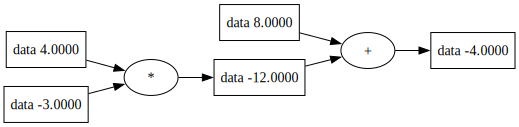

In [32]:
draw_dot(e)

Note that every value object becomes a node in the graph. The operators are also represented as a kind of fake node so they can be visualized too.

In [33]:
nodes, edges = trace(e)
print("Nodes: ", nodes)
print("Edges: ", edges)

Nodes:  {Value(data=8.0), Value(data=4.0), Value(data=-4.0), Value(data=-3.0), Value(data=-12.0)}
Edges:  {(Value(data=-12.0), Value(data=-4.0)), (Value(data=-3.0), Value(data=-12.0)), (Value(data=4.0), Value(data=-12.0)), (Value(data=8.0), Value(data=-4.0))}


#### Compute Graph with Labels

Let's update the graph to show the object labels too.

In [34]:
# version 6
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [35]:
a = Value(4.0, label='a')
b = Value(-3.0, label='b')
c = Value(8.0, label='c')

d = a*b; d.label = 'd'
e = d + c; e.label = 'e'

In [36]:
# draw_dot version 2
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and set of all edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

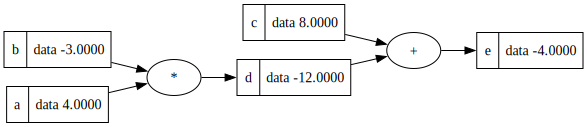

In [37]:
draw_dot(e)

Lets add one more operation, or stage in the compute graph.

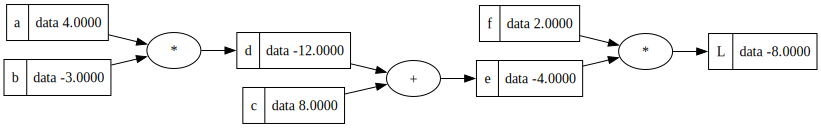

In [38]:
a = Value(4.0, label='a')
b = Value(-3.0, label='b')
c = Value(8.0, label='c')

d = a*b; d.label = 'd'
e = d + c; e.label = 'e'
f = Value(2.0, label='f')

L = e*f; L.label = 'L'

draw_dot(L)

### Recap

So far we've built a Value class and associated data structures to capture a computational graph and calculate the output based on the inputs and operations. We'll call this the __forward pass__.

But now, we're interested in calculating the gradients with respect to some of the parameters with respect to $L$. In practice, some of the data will be our input data, which is fixed, but we want to update the weights to minimize the value $L$.

So next we'll update our Value class to capture the partial derivative at each node relative to L.

## Calculating Gradients


Add a gradient member variable, `grad`.

In [39]:
# version 7
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

And update `draw_dot()` to show `grad` in the node info.

In [40]:
# draw_dot version 3
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and set of all edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

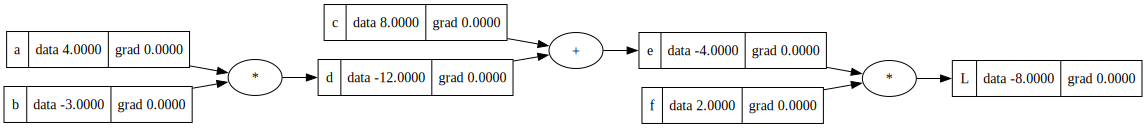

In [41]:
a = Value(4.0, label='a')
b = Value(-3.0, label='b')
c = Value(8.0, label='c')

d = a*b; d.label = 'd'
e = d + c; e.label = 'e'
f = Value(2.0, label='f')

L = e*f; L.label = 'L'

draw_dot(L)

### Manual Gradient Calculation

Before we start implementing backpropagation, it is helpful manually calculate some gradients to better understand the procedure.

For the node $L$, we trivially calculate $\frac{dL}{dL}$. From limit ratio perspective, we're asking how much does $L$ change if we change $L$ by $h$?

The answer should obviously $h$, so the gradient is just 1.

In [42]:
L.grad = 1.0

If we go backwards a step in the graph, we see that $L=e*f$, so we now want to know what
$$\frac{\partial{L}}{\partial{e}}$$
and
$$\frac{\partial{L}}{\partial{f}}$$
are.

Even if you don't remember, we can go back to the limit definition.

$$  \frac{\partial{L}}{\partial{e}} = \frac{(e+h)f - ef}{h} = \frac{ef+hf - ef}{h} = \frac{hf}{h} = f$$

In [43]:
e.grad = f.data

Similarly
$$\frac{\partial{L}}{\partial{f}} = e$$

In [44]:
f.grad = e.data

> To summarize, the partial derivative w.r.t. to one operand of a simple product is simply the other operand.

> Important Note: We need to also multiply by the gradient of the parent node, but it is 1, so we left it out. But we'll incorporate gradient of parent node below.

And we can redraw the graph above again.

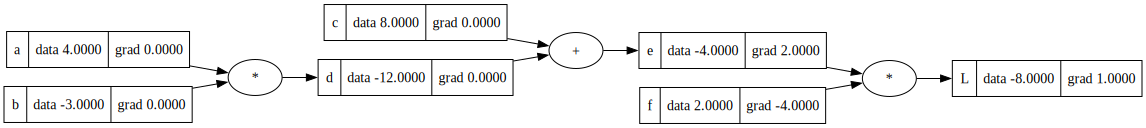

In [45]:
draw_dot(L)

We can double check by calculating the ratio after shifting $f$ for $\partial{L}/\partial{f}$ and after shifting $e$ for $\partial{L}/\partial{e}$.

In [46]:
# Let's do it in local function scope so we don't alter these values in global scope.
def temp_calc():

    h = 0.001

    # Original values
    a = Value(4.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(8.0, label='c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(2.0, label='f')
    L = e*f; L.label = 'L'
    L1 = L.data

    # Nudged values
    a = Value(4.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(8.0, label='c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    e.data += h         ## <<<<<<<<<<<<<<<<<<<<<<
    f = Value(2.0, label='f')
    L = e*f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)

temp_calc()

1.9999999999997797


### Propagating Back

Now we want to calculate
$$\frac{\partial{L}}{\partial{c}}$$
or put another way, we want to know how much $L$ wiggles if we wiggle $c$, or how $c$ influences $L$.

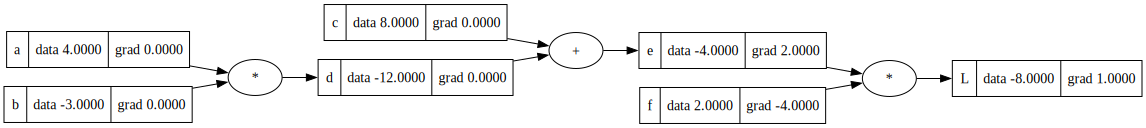

In [47]:
draw_dot(L)

Looking at the graph again we see that $c$ influences $e$ and $e$ influences $L$, so we should be able see the ripple effect of $c$ on $L$.

But first, what is

$$ \frac{\partial{e}}{\partial{c}} = \frac{\partial{}}{\partial{c}} (d + c) $$

#### *** Exercise *** (2 points)

Prove, using the limit ratio, that
$$ \frac{\partial{}}{\partial{c}} (d + c) = 1 $$

#### Your Answer

$f(c) = (d + c)$, so apply the ratio to this function.

(your answer here)

### Question

So now we know $\partial{L}/\partial{e}$ and we also know $\partial{e}/\partial{c}$,

how do we get $\partial{L}/\partial{c}$?

### The Chain Rule

To paraphrase from the Wikipedia page on [Chain rule](https://en.wikipedia.org/wiki/Chain_rule), if a variable $L$ depends on the variable $e$, which itself depends on the variable $c$ (that is, $e$ and $L$ are dependent variables), then $L$ depends on $c$ as well, via the intermediate variable $e$. In this case, the chain rule is expressed as
$$\frac{dL}{dc} = \frac{dL}{de} \cdot \frac{de}{dc},$$
and
$$ \left.\frac{dL}{dc}\right|_{c} = \left.\frac{dL}{de}\right|_{e(c)}\cdot \left. \frac{de}{dc}\right|_{c} ,$$
for indicating at which points the derivatives have to be evaluated.

Now since we've established that
$$ \frac{\partial{e}}{\partial{c}} = 1$$
then
$$\frac{dL}{dc} = \frac{dL}{de} \cdot 1.$$
So in the case of an operand in an addition operation, we just copy the gradient of the parent node.

Or put another way, in the addition operator, we just route the parent gradient to the child.

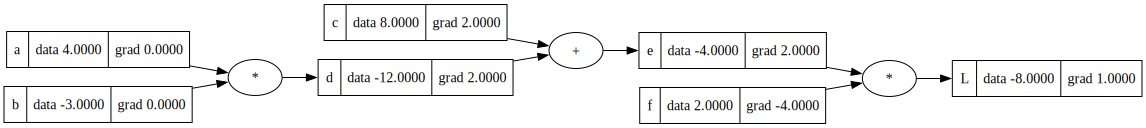

In [48]:
d.grad = e.grad
c.grad = e.grad
draw_dot(L)

Let's verify numerically that this is the case again.

In [49]:
# Let's do it in local function scope so we don't alter these values in global scope.
def temp_calc():

    h = 0.001

    # Original values
    a = Value(4.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(8.0, label='c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(2.0, label='f')
    L = e*f; L.label = 'L'
    L1 = L.data

    # Tweaked values
    a = Value(4.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(8.0, label='c')
    c.data += h
    d = a*b; d.label = 'd'
    #d.data += h
    e = d + c; e.label = 'e'
    #e.data += h
    f = Value(2.0, label='f')
    L = e*f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)

temp_calc()

1.9999999999988916


### Propagating Back Again

Now we want to calculate
$$ \frac{\partial{L}}{\partial{b}}$$
and
$$ \frac{\partial{L}}{\partial{a}}.$$
But we have
$$ \frac{\partial{L}}{\partial{d}}$$
and we know that
$$ \frac{\partial{}}{\partial{b}}(a\cdot b) = a$$
so again from the chain rule
$$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{d}} \cdot \frac{\partial{d}}{\partial{b}},$$


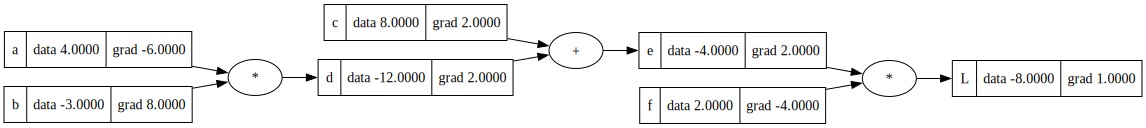

In [50]:
b.grad = a.data * d.grad
a.grad = b.data * d.grad
draw_dot(L)

In [51]:
# Let's do it in local function scope so we don't alter these values in global scope.
def temp_calc():

    h = 0.001

    # Original values
    a = Value(4.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(8.0, label='c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(2.0, label='f')
    L = e*f; L.label = 'L'
    L1 = L.data

    # Tweaked values
    a = Value(4.0, label='a')
    a.data += h
    b = Value(-3.0, label='b')
    #b.data += h
    c = Value(8.0, label='c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(2.0, label='f')
    L = e*f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)

temp_calc()

-6.000000000000227


### Recap

As you saw, we recursively went backwards through the computation graph and applied the local gradients to the gradients calculated so far to get the partial gradients. Put another we propagated this calculations backwards through the graph.

That is the essence of Back Propagation.

## A Step in Optimization

Let's take a look at the graph again. Assume we want to influence the value of L to increase. We are free to change the values of the leaf nodes -- all the other nodes are derived from children and leaf nodes.

The leaf nodes are $a, b, c$ and $f$.

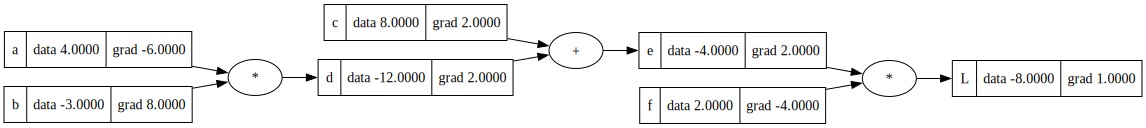

In [52]:
draw_dot(L)

In [53]:
# remind ourselves what L is
print(L.data)

-8.0


In [54]:
# nudge all the leaf nodes along the direction of the gradient
step_size = 0.01

a.data += step_size * a.grad
b.data += step_size * b.grad
c.data += step_size * c.grad
f.data += step_size * f.grad

d = a*b
e = d + c
L = e*f

print(L.data)

-6.830208


## Neuron

Now let's switch gears a bit to define a neuron.


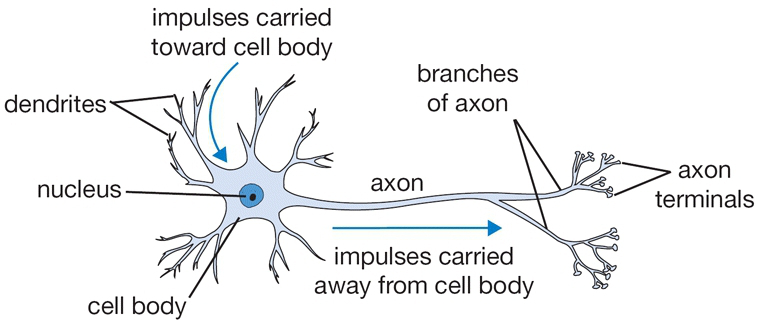

From [cs231n](https://cs231n.github.io/neural-networks-1/)

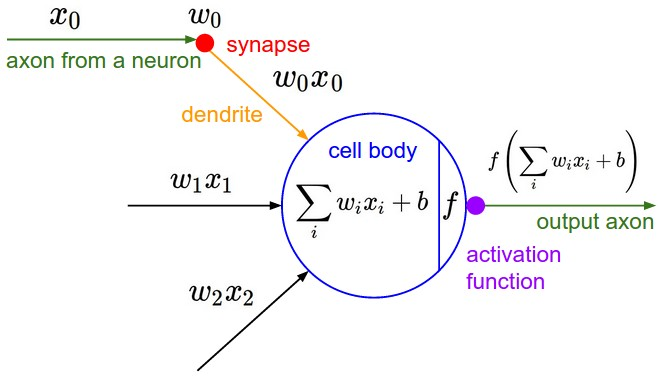

From [cs231n](https://cs231n.github.io/neural-networks-1/)

Activation function is typically some nonlinear function that compresses the input in some way. Historically, it's been the $\tanh()$ function. See for example [Hyperbolic Functions](https://en.wikipedia.org/wiki/Hyperbolic_functions#Tanh).

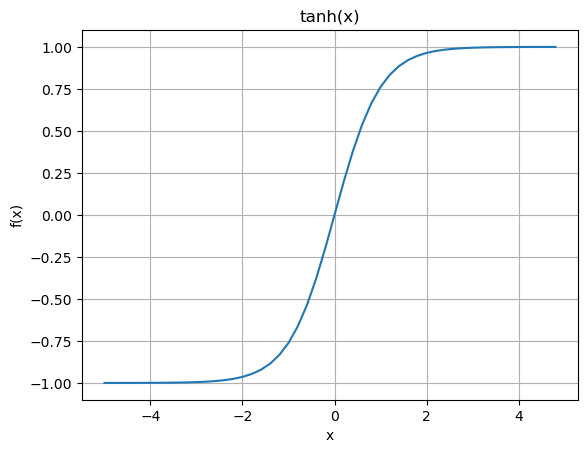

In [55]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.title('tanh(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

So, if we want apply $\tanh$ to our `Value` object, we have to add that as a method to our `Value` class. We could implement it as the ration of exponents as defined [here](https://en.wikipedia.org/wiki/Hyperbolic_functions#Tanh), or we can just use the python math tanh function.

In [56]:
# version 8
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        # t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')
        return out


Now, we can write out our equations for the neuron.

In [57]:
# inputs x0, x1
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
#b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

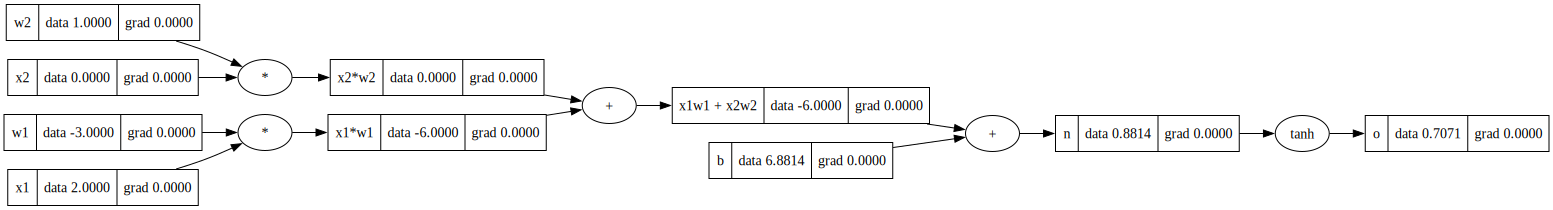

In [58]:
draw_dot(o)

## Exercise

The $\tanh$ activation function is not doing much to its input since it is around the linear part of the curve. Try bumping the bias to 8.0 to see the effect the activation function has.

Now let's manually calculate the back propagated gradient again.

In [59]:
o.grad = 1.0

In [60]:
# o = tanh(n)
# from https://en.wikipedia.org/wiki/Hyperbolic_functions#Derivatives
# do/dn = 1 - tanh(x)**2
# do/dn = 1 - o**2
n.grad = 1 - o.data**2

Now recall to back propagate through addition, we just copy the parent gradient

In [61]:
x1w1x2w2.grad = n.grad
b.grad = n.grad

And we just have another addition node, so copy again.

In [62]:
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

And now we do the two product nodes.

In [63]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

## Coding Backpropagation

In [64]:
# version 9
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._backward = lambda: None  # by default backward doesn't do anything
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        # t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out


In [65]:
# inputs x0, x1
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
#b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

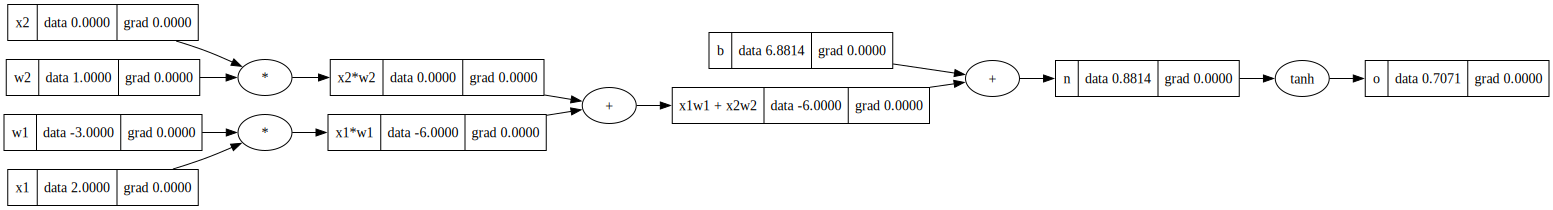

In [66]:
draw_dot(o)

In [67]:
o.grad = 1.0

In [68]:
o._backward()

In [69]:
n._backward()

In [70]:
b._backward()

In [71]:
x1w1x2w2._backward()

In [72]:
x1w1._backward()
x2w2._backward()

So how do we automate the backward calls.

## Topological Sort

First we have to do a topological sort.

In [73]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

Let's reinitialize to clear the gradients.

In [74]:
# inputs x0, x1
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
#b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [75]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

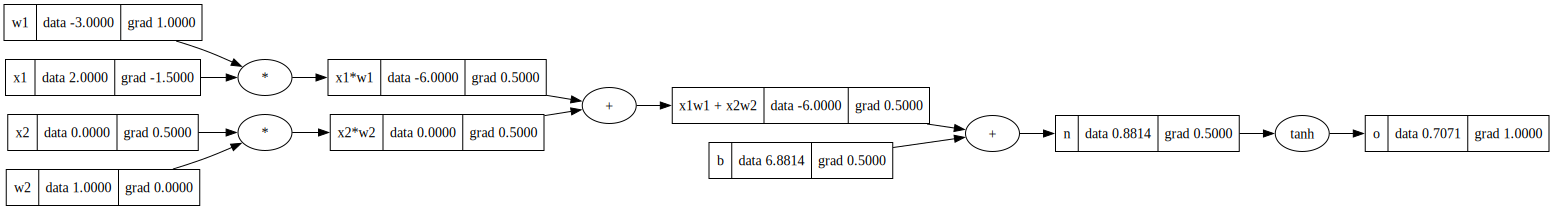

In [76]:
draw_dot(o)

Now let's add the backward loop to the Value object.

In [77]:
# version 10
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._backward = lambda: None  # by default backward doesn't do anything
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        # t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

So let's reinitialize the network again

In [78]:
# inputs x0, x1
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
#b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

We can see that all the gradients are zero.

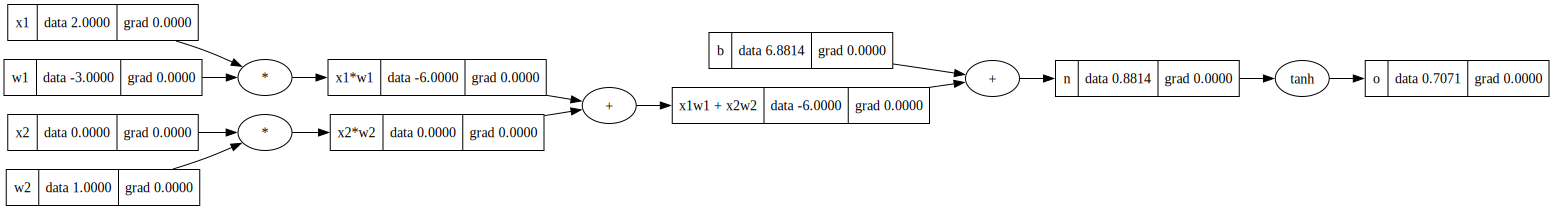

In [79]:
draw_dot(o)

In [80]:
o.backward()

And if we draw the graph again, we see all the gradients are initialized.

## Missing Feature

The code won't handle an important condition which is illustrated by the following examples.

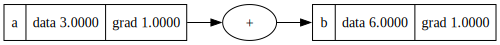

In [81]:
a = Value(3.0, label='a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

### Exercise

Can you see the issue?

### Answer

From the graph we see that the forward pass worked. $b$ is indeed `a+a` or $3+3 = 6$. But the backward pass didn't.
$$db/da = 1 + 1 = 2,$$
not 1.

If you look at the code for the `__add__`, the issue is that both `self` and `other` are the same object, so the gradient gets overwritten.

Look at another example.

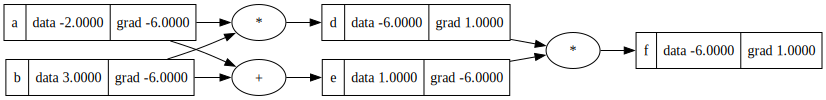

In [82]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b  ; d.label = 'd'
e = a + b  ; e.label = 'e'
f = d * e  ; f.label = 'f'

f.backward()

draw_dot(f)

### Exercise

See the issue?

What should grad of a and grad of b be?

### Answer

To find the partial derivative $\frac{\partial f}{\partial a}$, we first need to define $f$ in terms of $a$ and $b$.

Given:
$$\begin{aligned}
d &= a \times b \\
e &= a + b      \\
f &= d \times e
\end{aligned}$$

Then $f$ can be expanded as:
$$\begin{aligned}
f &= (a \times b) \times (a + b) \\
f &= a^2 \times b + a \times b^2
\end{aligned}$$

Next, we find the partial derivative of $f$ with respect to $a$:
$$ \frac{\partial f}{\partial a} = 2a \times b + b^2 $$

Finally, we plug in the given values $a = -2.0$ and $b = 3.0$:
$$\begin{aligned}
\frac{\partial f}{\partial a} &= 2(-2.0) \times 3.0 + 3.0^2 \\
\frac{\partial f}{\partial a} &= -12.0 + 9.0                 \\
\frac{\partial f}{\partial a} &= -3.0
\end{aligned}$$

So the partial derivative $\frac{\partial f}{\partial a}$ for the value $a = -2.0$ is $-3.0$.

### Alternate Answer

Another way to look at it is that df/da at a is the contribution of both parent nodes of a in the graph.

1 * df/de + 3 *df/dd
1 * -6 + 3 * 1 = -3

So here we have to take into account that we have to accumulate the gradients from the parent. Since we intialize the gradient to zero anyway, we can just do simple accumulation.

In [83]:
# Value version 11
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._backward = lambda: None  # by default backward doesn't do anything
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        # t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

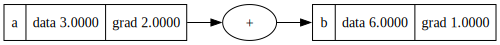

In [84]:
a = Value(3.0, label='a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

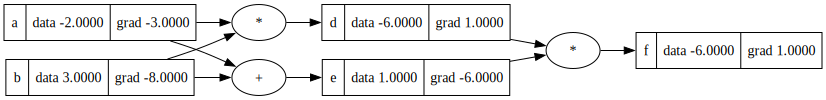

In [85]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b  ; d.label = 'd'
e = a + b  ; e.label = 'e'
f = d * e  ; f.label = 'f'

f.backward()

draw_dot(f)

## Enhancements to `Value` Class

There are still some useful operations that are not supported.

In [86]:
a = Value(2.0, label = 'a')

# Adding a constant to a Value object
try:
    b = a + 1
except Exception as e:
    print("ERROR:", e)
else:
    print("It worked!")

ERROR: 'int' object has no attribute 'data'


In [87]:
# Value version 12
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._backward = lambda: None  # by default backward doesn't do anything
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  ## <<<<<<<<<<<<<<<<<
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        # t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [88]:
a = Value(2.0, label = 'a')

# Adding a constant to a Value object
#  Now it works!
b = a + 1

In [89]:
# Note that we still have this problem

try:
    c = 1 + a
except Exception as e:
    print("ERROR:", e)
else:
    print("It worked!")

ERROR: unsupported operand type(s) for +: 'int' and 'Value'


In [90]:
# Value version 13
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._backward = lambda: None  # by default backward doesn't do anything
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  ## <<<<<<<<<<<<<<<<<
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __radd__(self, other):        ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  ## <<<<<<<<<<<<<<<<<
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other):    ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        return self * other

    def tanh(self):
        x = self.data
        # t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [91]:
a = Value(2.0, label = 'a')

try:
    c = 1 + a
except Exception as e:
    print("ERROR:", e)
else:
    print("It worked!")

It worked!


We also checked for a constant and right operator on `__mul__`.

## Other Operators and Methods

We could implement the tanh in it's exponent form. We're just missing `exp()`, `__sub__` and `__truediv__`.

We'll keep `tanh` for now, but we'll add missing operators.

In [92]:
# Value version 14
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # default to 0, no impact on the output
        self._backward = lambda: None  # by default backward doesn't do anything
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        """Return a string representation of the object for display"""
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        # t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

    def __neg__(self): # -self
        return self * -1

    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

## Comparing to PyTorch

We're using a class implementation that resembles the PyTorch implementation, and in fact we can compare our implementation with PyTorch.

In [93]:
# Simple Neuron with 2 inputs and tanh activation function

# inputs x0, x1
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
#b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [94]:
o.backward()

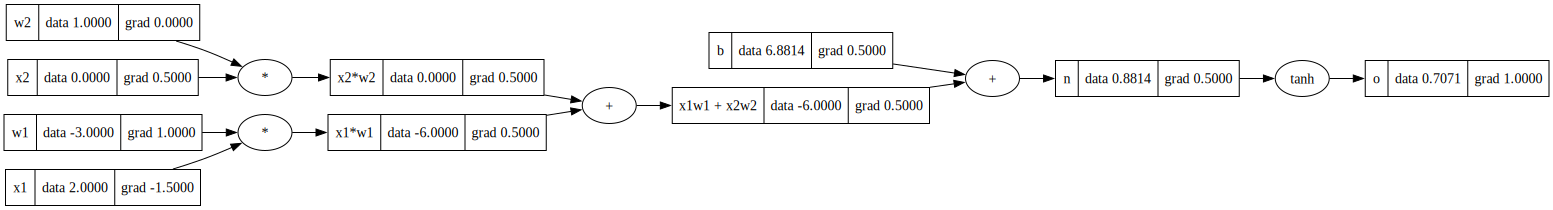

In [95]:
draw_dot(o)

So let's define the same thing with PyTorch.

In [96]:
import torch

In [97]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2.grad', x2.grad.item())
print('w2.grad', w2.grad.item())
print('x1.grad', x1.grad.item())
print('w1.grad', w1.grad.item())

0.7071066904050358
---
x2.grad 0.5000001283844369
w2.grad 0.0
x1.grad -1.5000003851533106
w1.grad 1.0000002567688737


## Notes

The fundamental data object of pytorch is a Tensor, which is a kind of a multidimensional array, since more realistic neural networks are more compactly expressed in Tensors, rather than scalar values.

Also, for performance reasons, the default datatype of pytorch is float32, since float32 arithmetic is about 2x faster on CPUs and GPUs than float64. However, the default float datatype of python is float64, so to match our python implemenation we specify `double()`.

In [98]:
import numpy as np
for f in (np.float32, np.float64, float):
    finfo = np.finfo(f)
    print(finfo.dtype, finfo.nexp, finfo.nmant)

float32 8 23
float64 11 52
float64 11 52


Also by default, tensors by default don't store gradients and so won't support backprop, so we explicitly set `requires_grad = True`.

## Neural Network Modules

Now we'll define some classes which help us build out a small neural network.


In [99]:
import random
# we assume that Value class is already defined

class Module:
    """Define a Module base class """
    def zero_grad(self):
        """When we run in a training loop, we'll need to zero out all the gradients
        since they are defined to accumulate in the backwards passes."""
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):

    def __init__(self, nin):
        """Randomly initialize a set of weights, one for each input, and initialize the bias to zero."""
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """Implement the forward pass of the neuron"""
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        return act.tanh()

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        return f"Neuron({len(self.w)})"

class Layer(Module):

    def __init__(self, nin, nout):
        """Initialize nout Neurons, each with nin inputs"""
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        """Forward pass each neuron in the layer"""
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

class MLP(Module):
    """Define a Multi-Layer Perceptron"""

    def __init__(self, nin: int, nouts: list):
        """
        Parameters:
            nin: Number of inputs (int)
            nouts: A list of the number of neurons in each layer
        """
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"

In [100]:
help(MLP)

Help on class MLP in module __main__:

class MLP(Module)
 |  MLP(nin: int, nouts: list)
 |  
 |  Define a Multi-Layer Perceptron
 |  
 |  Method resolution order:
 |      MLP
 |      Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x)
 |      Call self as a function.
 |  
 |  __init__(self, nin: int, nouts: list)
 |      Parameters:
 |          nin: Number of inputs (int)
 |          nouts: A list of the number of neurons in each layer
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  parameters(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Module:
 |  
 |  zero_grad(self)
 |      When we run in a training loop, we'll need to zero out all the gradients
 |      since they are defined to accumulate in the backwards passes.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Module:
 |  
 |  __dict__
 |      dicti

### Init and Eval a Neuron

In [101]:
# 2 inputs
x = [2.0, 3.0]

# initialize neuron with 2 inputs
n = Neuron(2)

# evaluate our neuron with our 2 inputs
n(x)

Value(data=0.6241402944619124)

In [102]:
# list the 2 weights and the bias
n.parameters()

[Value(data=-0.6062708572486148),
 Value(data=0.9597105871307454),
 Value(data=-0.9348310693886166)]

### Init and Eval a Layer of Neurons

In [103]:
# same 2 inputs again
x = [2.0, 3.0]

# Now initialize a layer of 3 neurons, each with 2 inputs
l = Layer(2, 3)

# Evaluate our layer of neurons with the 2 inputs
l(x)

[Value(data=-0.4621065137350602),
 Value(data=-0.9615001554046205),
 Value(data=-0.9981359384235466)]

In [104]:
l.parameters()

[Value(data=0.8498437677594213),
 Value(data=-0.5481475591234792),
 Value(data=-0.5552313245619522),
 Value(data=-0.5506205917952844),
 Value(data=0.023526421534207698),
 Value(data=-0.9347434010496047),
 Value(data=-0.7943926395871155),
 Value(data=-0.6689325619446038),
 Value(data=0.1069768430843836)]

### Init and Eval an MLP

We'll instantiate an MLP like the picture below.

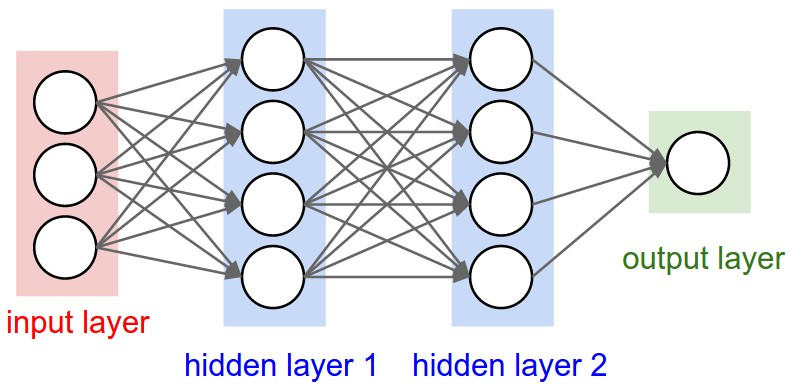

From [cs231n](https://cs231n.github.io/convolutional-networks/)

In [105]:
x = [2.0, 3.0, -1.0]
m = MLP(3, [4, 4, 1])
m(x)

Value(data=-0.7339650420904817)

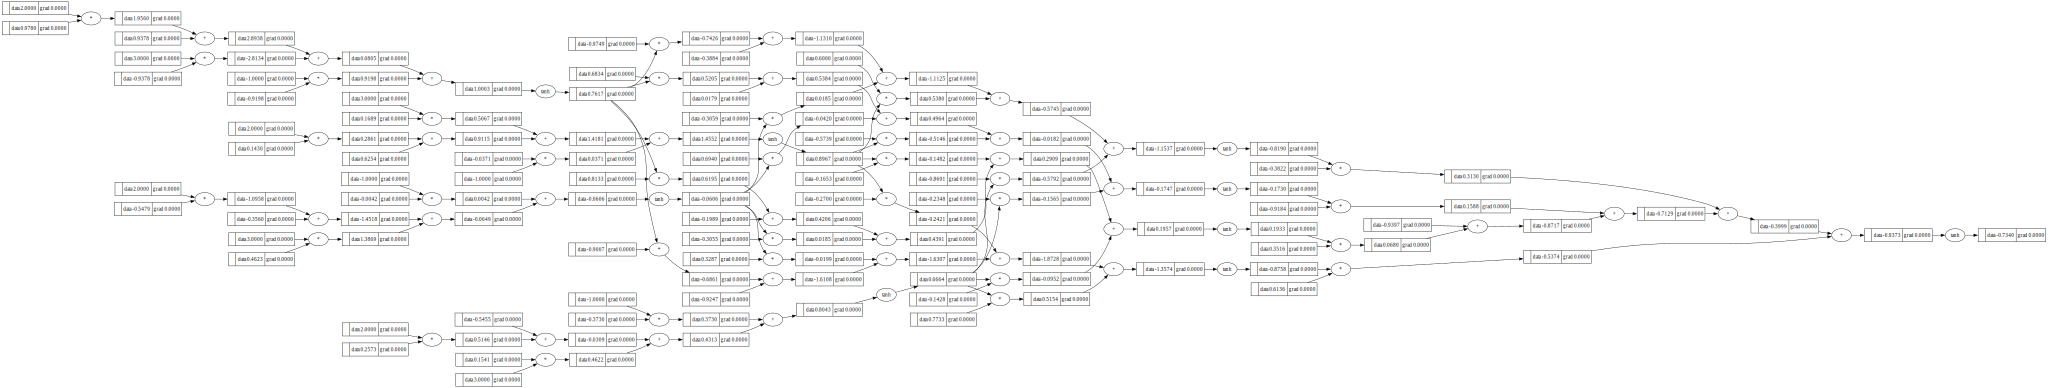

In [106]:
draw_dot(m(x))

## Back Propagate on the MLP

In [107]:
# Define 4 different sets of inputs
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

# For each input set, we have a desired target value -- binary classification
ys = [1.0, -1.0, -1.0, 1.0]

We can evaluate this on the randomly initialized network.

In [108]:
m = MLP(3, [4, 4, 1])

In [109]:
ypred = [m(x) for x in xs]
ypred

[Value(data=-0.09943780721054965),
 Value(data=-0.5415656411533079),
 Value(data=-0.6745129477513896),
 Value(data=-0.12998361631280475)]

And then we can calculate a loss function.

In [110]:
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]

[Value(data=1.2087634919239418),
 Value(data=0.2101620613711777),
 Value(data=0.10594182118148965),
 Value(data=1.276862973135364)]

We'll define `loss` as a measure of how the predictions differ from the ground truth.

$$ \mathrm{Loss} = \sum{ (y_{\mathrm{pred}} - y_{\mathrm{gt}})^2 } $$

In [111]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=2.801730347611973)

Now we can draw the computation graph all the way to the loss, but of course the graph is massive. One thing to note is that all the gradients are zero.

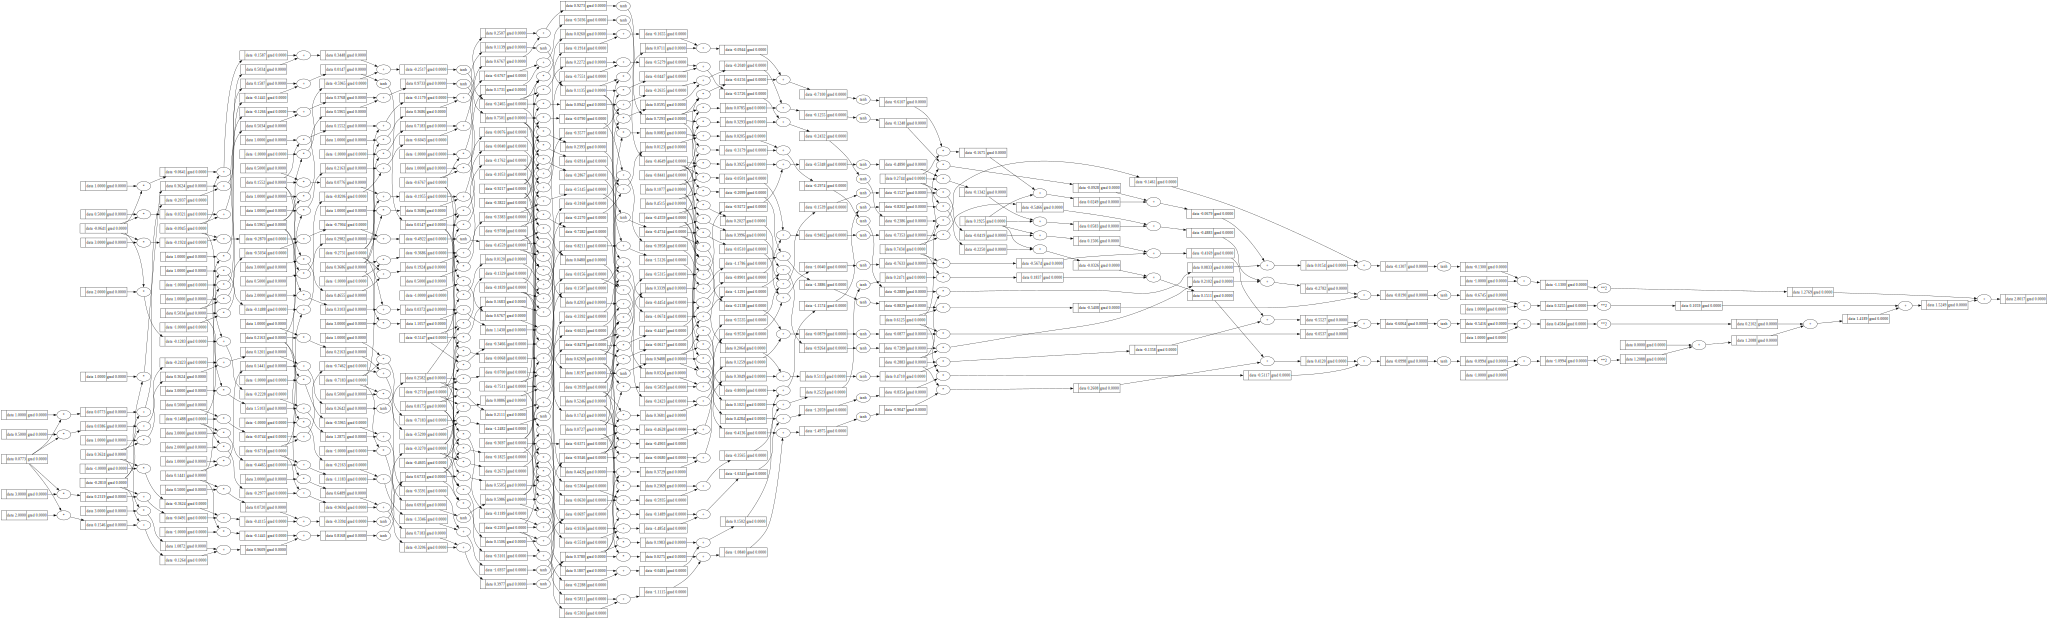

In [112]:
draw_dot(loss)

But now here is the powerful outcome. We can just call `backward()` on the `loss` node.

You can see now that three are gradients calculated at each node. Remember this is the gradient of that node with respect to the final node, which in this case is loss.

In [113]:
loss.backward()

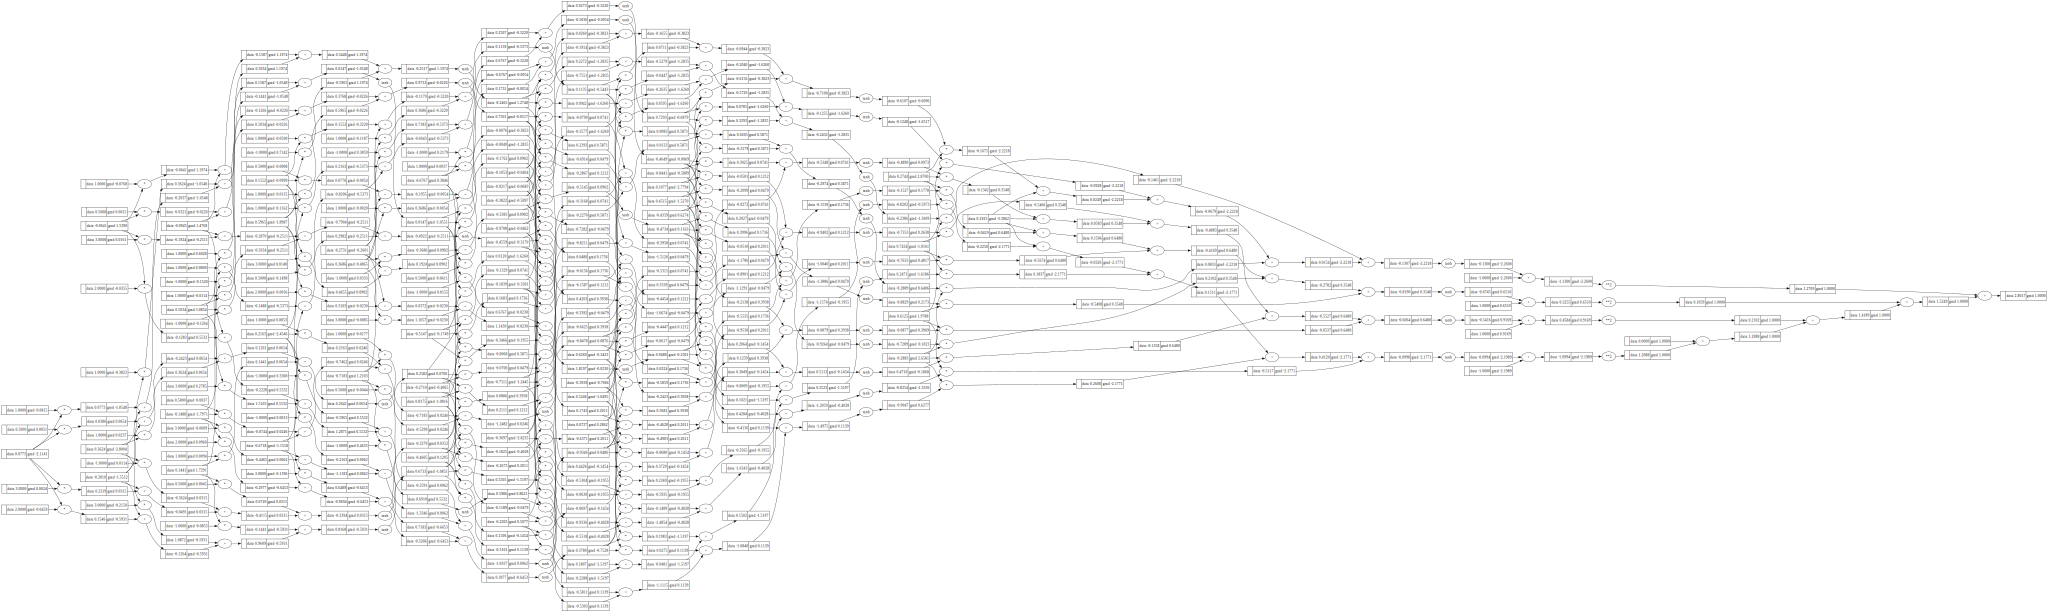

In [114]:
draw_dot(loss)

Alternatively we can inspect the gradient on one particular node.

> TODO: Add up/down widget for each of layer, neuron and weight, so you can explore the gradients.

In [115]:
m.layers[0].neurons[0].w[0].grad

-2.1140944954342142

As you can notice from the graph, we calculated the gradient on every node, including the inputs, but from a training perspective, the inputs are fixed. We can only adjust the weights and biases during training.

We have the convenience function, `parameters()` to enumerate all the parameters.

In [116]:
m.parameters()

[Value(data=0.0772997585766475),
 Value(data=0.36241233668560957),
 Value(data=0.14407354775243286),
 Value(data=-0.2809661610402727),
 Value(data=-0.06414716681661559),
 Value(data=0.5034328178768126),
 Value(data=0.5964616558152673),
 Value(data=-0.09452855013658157),
 Value(data=-0.14883203256390676),
 Value(data=0.21628905630844608),
 Value(data=-0.7182599531810459),
 Value(data=-0.6717698189564052),
 Value(data=0.15516663938390507),
 Value(data=0.368579656424306),
 Value(data=-0.6766702420674937),
 Value(data=-0.273089720600149),
 Value(data=-0.5146882131662365),
 Value(data=-0.10527884279299715),
 Value(data=0.6268868451207281),
 Value(data=-0.8440871931492706),
 Value(data=-0.18388805132126662),
 Value(data=0.8175202767742784),
 Value(data=-0.38222583119434983),
 Value(data=0.524560837193544),
 Value(data=0.107660095249277),
 Value(data=-0.3697411315396182),
 Value(data=-0.46048326961755515),
 Value(data=-0.9707784506033212),
 Value(data=0.07274081761191908),
 Value(data=-0.4358

Now we want to nudge all the parameters a tiny amount proportional to the gradient.

Think back to our 1-D function at the beginning of the lecture. When the gradient is negative, we want to nudge in the positive direction to reduce the function value, and when the gradient is positive, we want to nudge the value in the negative direction.

So we have to move in a direction negative to the gradient.

In [117]:
for p in m.parameters():
    p.data += -0.01 * p.grad

We can now do a forward pass of the data again to get new predictions.

In [118]:
ypred = [m(x) for x in xs]
ypred

[Value(data=0.16669302575012276),
 Value(data=-0.5213547538741742),
 Value(data=-0.6197671320871576),
 Value(data=0.08740802968691236)]

And now calculate the loss again and we see that we've decreased the loss slightly.

In [119]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=1.9009029230934864)

Now, to iterate, we can do another backward pass since we just did another forward pass, but we have to be careful, because our gradients are all accumulators, so we have to clear the gradients before we run backwards.

In [120]:
m.zero_grad()

We can see that the loss is going in the right direction.

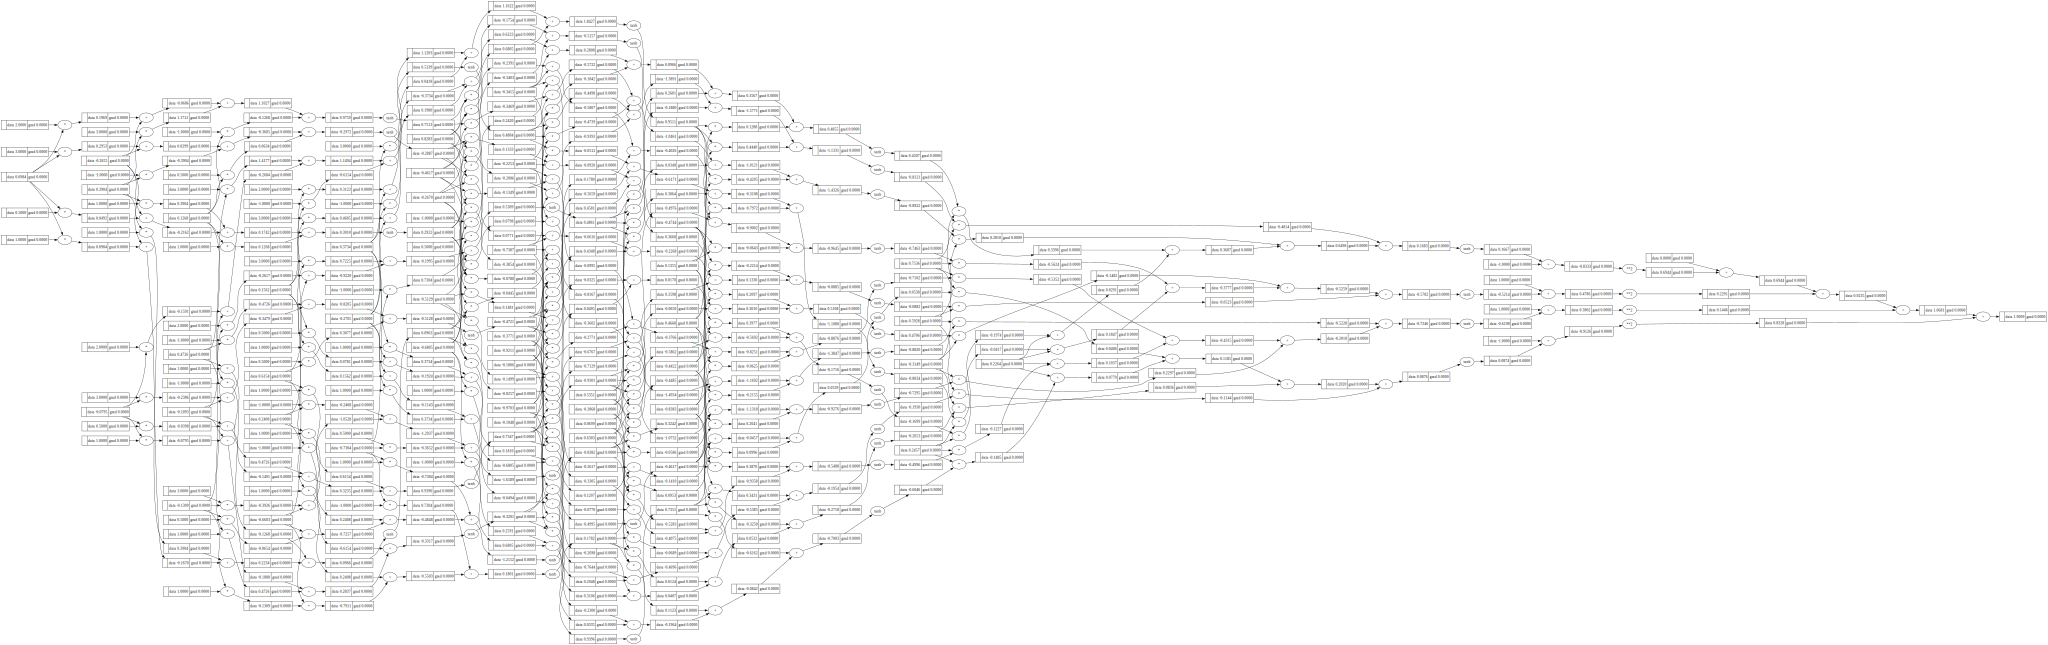

In [121]:
draw_dot(loss)

In [122]:
loss.backward()

In [123]:
for p in m.parameters():
    p.data += -0.01 * p.grad

In [124]:
ypred = [m(x) for x in xs]
ypred

[Value(data=0.33317999660735137),
 Value(data=-0.5175774914427839),
 Value(data=-0.5853018227071636),
 Value(data=0.24061160713773277)]

In [125]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=1.4260257031511472)

## Training Loop
So after manually iterating, we put it all together in a training loop.

In [126]:
for k in range(20):

    # forward pass
    ypred = [m(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass
    m.zero_grad()
    loss.backward()

    # update parameters
    for p in m.parameters():
        p.data += -0.01 * p.grad

    print(k, loss.data)

0 1.4260257031511472
1 1.1636142440652413
2 0.9957549115255155
3 0.8750897709127191
4 0.7815135916147045
5 0.7054506741594658
6 0.6417700351776502
7 0.5874122771308161
8 0.5403820756631411
9 0.49928307325672805
10 0.4630850537351189
11 0.43099796888757025
12 0.40239861870640575
13 0.3767850636718899
14 0.353746606270744
15 0.33294305266821017
16 0.31408981524631663
17 0.2969468715812815
18 0.28131037590816893
19 0.26700615839564307


In [127]:
ypred

[Value(data=0.7936859099584685),
 Value(data=-0.7570961801498067),
 Value(data=-0.6951230677852844),
 Value(data=0.7307632173132607)]

## Summary

* What are NNs? NNs are fairly simple math expressions for the forward pass
* followed by loss function which we want to minimize
* then backward the loss to get the gradients
* update the weights based on the gradients...
* we saw we started from single neuron to a bigger MLP, and can continue to scale...

## Further Reading

If you are interested in exploring further, here are some links and references that might be of interest.

* [Automatic Differentiation with `TORCH.AUTOGRAD`](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)